# EDA cho dữ liệu California Housing

_Nội dung trong site này được tham khảo rất nhiều từ chương "End-to-End Machine Learning Project" của cuốn [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)._

Chúng ta cùng làm quen với bộ dữ liệu California Housing.

Cùng xem nhanh dữ liệu trong file này bằng cách hiển thị các dòng đầu tiên bằng phương thức `head()` trong `pandas`.

In [1]:
import pandas as pd

housing_path = "https://media.githubusercontent.com/media/tiepvupsu/tabml_data/master/california_housing/"
df_housing = pd.read_csv(housing_path + "housing.csv")
df_housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Ý nghĩa của mỗi cột trong bộ dữ liệu này tương đối rõ ràng dựa vào tiêu đề mỗi cột. Ở đây, cột nhãn là `median_house_value`; ta cần xây dựng mô hình dự đoán cột này dựa trên các cột còn lại.

## Một vài thống kê

Để có cái nhìn nhanh về thống kê của mỗi trường thông tin dạng *số*, phương thức `describe()` có thể được sử dụng:

In [2]:
df_housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Một vài quan sát với tập dữ liệu này:

* Cột `total_bedrooms` có ít giá trị (`count`) hơn các cột còn lại, 20433 so với 20640. Việc này chứng tỏ có hơn 200 giá trị bị khuyết ở đây.

* Cột `total_rooms`, `total_bedrooms`, `population` và `median_income` có giá trị lớn nhất vượt xa phân vị thứ ba (75%) của các cột đó.

* Cột `median_house_value` có khoảng giá trị khá lớn với giá trị cao nhất là $500001. Nhiều khả năng các giá trị trong cột này đã bị cắt ngọn tại giá trị này.

Với dữ liệu dạng hạng mục duy nhất là cột `ocean_proximity`, ta có thể dùng thuộc tính `value_counts`.

In [3]:
df_housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Ta quan sát thấy rằng phần lớn các giá trị nằm trong mục `<1H OCEAN` tức khoảng cách tới biển là nhỏ hơn 1h. Trong khi đó, chỉ có 5 giá trị bằng `ISLAND` tức ngoài đảo.

## Minh họa histogram

Để có cái nhìn tốt hơn về các phân bố của từng trường dữ liệu, chúng ta nên minh họa chúng. Phương thức `hist` của `pandas.DataFrame` cho phép ta minh họa histogram của các cột dạng số. Ở đây dải giá trị của mỗi cột dữ liệu được chia thành 50 khoảng (_bin_) đều nhau. Độ cao của mỗi bin tương ứng với số lượng điểm dữ liệu rơi vào bin đó.

/home/tiepvu/w/tabml_book/tabml_book_env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


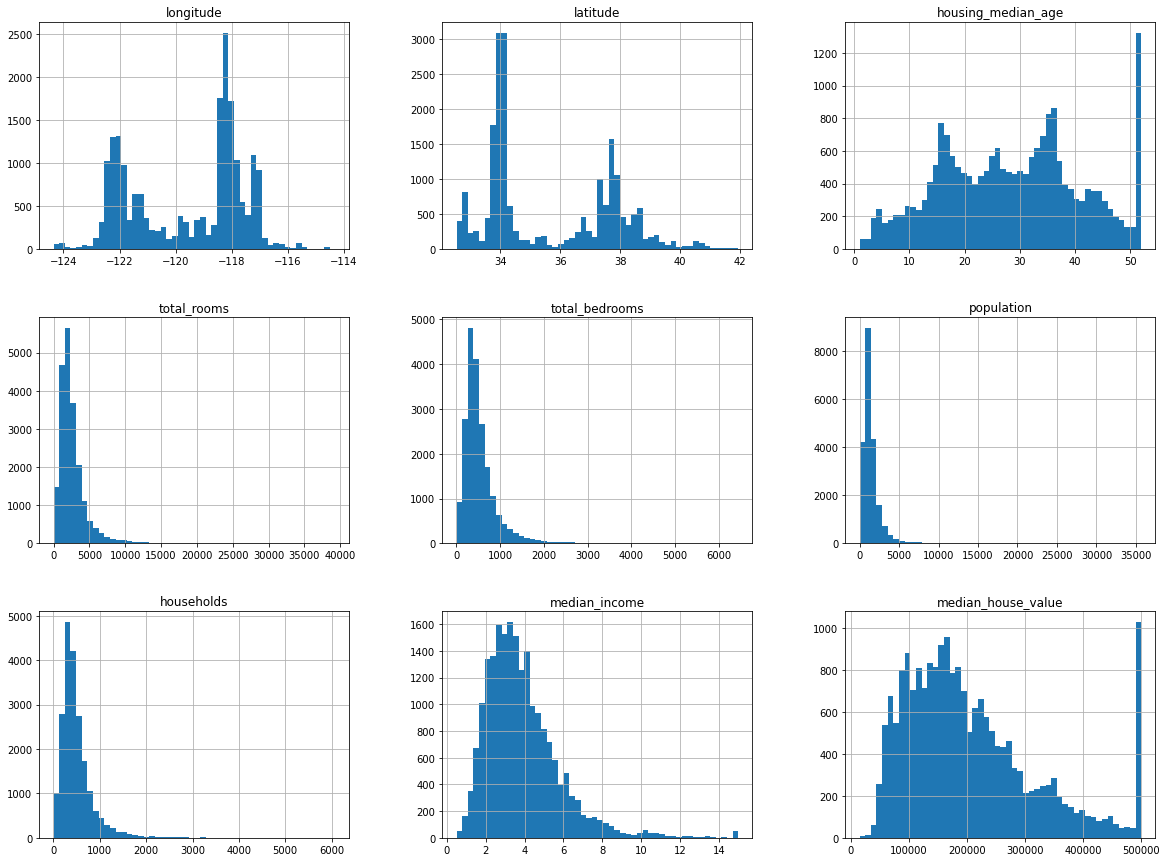

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

df_housing.hist(bins=50, figsize=(20, 15));

Một vài quan sát:

* Dựa vào các đồ thị của `longtitude` (kinh độ) và `latitude` (vĩ độ), ta thấy rằng có hai khu vực địa lý tập trung nhiều điểm dữ liệu. Khả năng đây là hai khu thành phố lớn với nhiều đô thị vệ tinh. Một chút hiểu biết về California cho phép ta dự đoán rằng đây là khu vực gần San Francisco và Los Angeles.

* Cột `housing_median_age` và `median_house_value` có bin cuối cùng cao hơn các bin gần đó, chứng tỏ có khả năng các giá trị bị cắt ngọn (_clip_) tại các giá trị đó. Tức là các giá trị lớn hơn được chuyển thành giá trị tại điểm bị cắt.

* Các cột `total_rooms, total_bedroooms, population, households` có hầu hết giá trị tập trung ở các bin đầu tiên, phần các bin sau rất dài nhưng có ít giá trị. Phân phối dữ liệu mà dữ liệu tập trung về một phía được gọi là "đuôi dài" (_long tail_) hay lệch (_skewed_). Các phân phối trong trường hợp này đều ở dạng lệch phải (_right-skewed distribution_). Ở đây lệch phải là ý nói đến phần "đuôi dài" của histogram, không phải phần mà dữ liệu chủ yếu thuộc về. Với những trường dữ liệu này, kỹ thuật cắt ngọn tại một giá trị khả dĩ thường được dùng giống như cách dữ liệu được tạo ở `housing_median_age` và `median_house_value`.

## Minh hoạ độ tương quan

Các histogram ở trên chỉ cho chúng ta thấy phân phối của từng trường dữ liệu. Một cách hữu ích khác là minh họa độ tương quan giữa các trường dữ liệu để tìm những trường quan trọng có khả năng mang lại kết quả cao khi xây dựng mô hình.

Thư viện pandas hỗ trợ vẽ [scatter_matrix](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.plotting.scatter_matrix.html) rất tiện lợi cho việc này. Cùng làm một ví dụ minh họa độ tương quan giữa các cột `median_income`, `population`, `housing_median_age` và cột nhãn `median_house_value`.

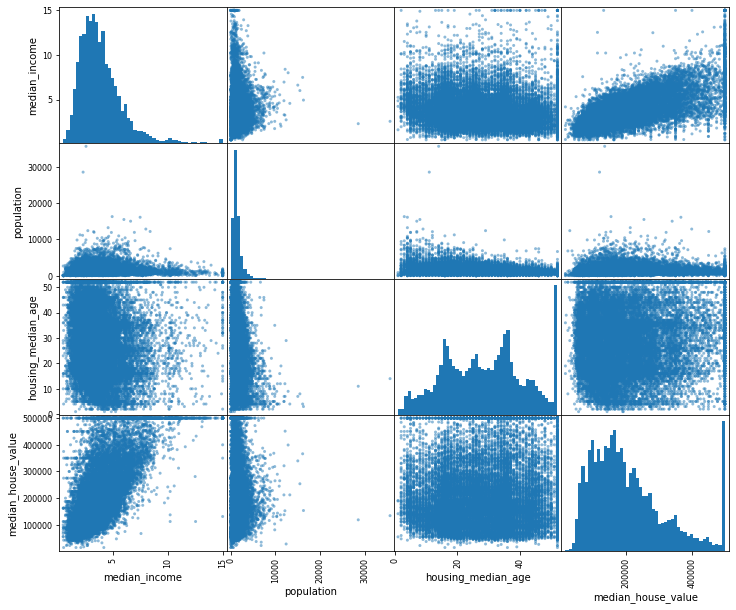

In [5]:
from pandas.plotting import scatter_matrix

columns = ["median_income", "population", "housing_median_age", "median_house_value"]
scatter_matrix(df_housing[columns], figsize=(12,10), hist_kwds={'bins': 50});

Các hình trên đường chéo thể hiện histogram của mỗi cột.

Các hình còn lại thể hiện tọa độ các điểm dữ liệu.
Cụ thể, với ô ở góc trên bên phải tương ứng với cặp cột (`median_house_value`, `median_income`), ta lấy hai cột tương ứng trong `df_housing` ra làm hoành độ và tung độ cho các điểm này. Phóng to ô này ra ta sẽ thấy:

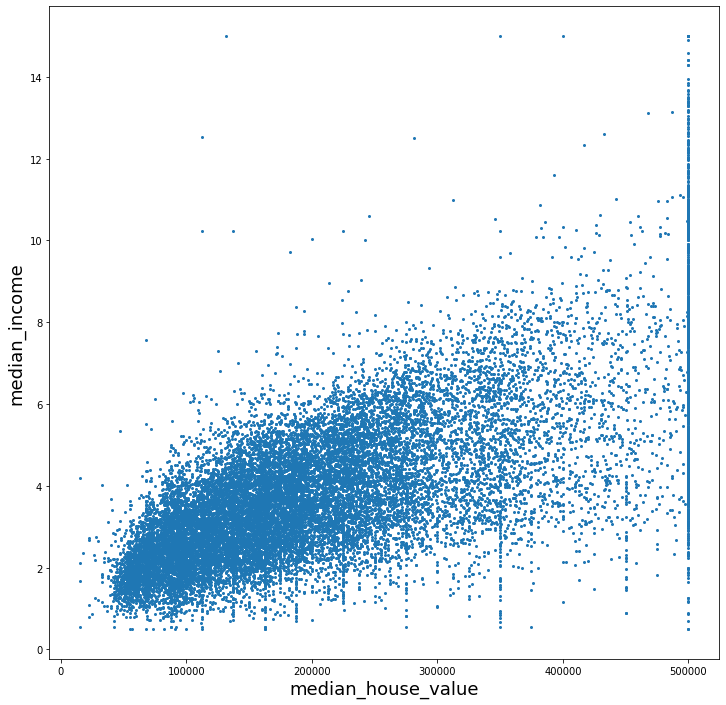

In [6]:
x_label = "median_house_value"
y_label = "median_income"
plt.figure(figsize=(12, 12))
plt.scatter(df_housing[x_label], df_housing[y_label], s=4)
plt.xlabel(x_label, fontsize=18)
plt.ylabel(y_label, fontsize=18);

Ở đây, ta quan sát thấy rằng các khu vực có thu nhập trung vị cao (`median_income` cao) có xu hướng có giá cao hơn. Sự thật là việc này không hoàn toàn đúng khi ở phần sát biên phải, giá nhà ở mức cao nhất nhưng thu nhập trung vị trải dài từ gần thấp nhất tới gần cao nhất. Tuy nhiên, phần lớn dữ liệu tuân theo quy luật thu nhập tăng thì giá nhà tăng. Thêm nữa, ta có hai quan sát khác:

* Các điểm dữ liệu chủ yếu nằm trong phần phía dưới trái, mật độ các điểm ở các ô còn lại khá thưa.

* Ngoài cột tương ứng với giá nhà cao nhất, có khá nhiều các "cột" có nhiều điểm tập trung. Ví dụ ở cột có giá nhà khoảng $350k và $450k có khá nhiều điểm. Điều này khá có lý vì giá cả thường ở quanh quẩn các số tròn ($449k, $450k, ...).

* Khu vực có thu nhập thấp vẫn có nhiều căn nhà đắt tiền (phần dưới bên phải) hơn số lượng căn nhà có giá trị thấp ở khu vực có thu nhập cao (phần trên bên trái).

Bạn đọc có thể quan sát thêm các ô khác và đưa ra nhận xét. Càng quan sát nhiều và hiểu về dữ liệu, chúng ta sẽ có lợi thế trong việc giải thích kết quả của mô hình sau này.

## Minh họa trên bản đồ

Ngoài các minh họa tổng quát phía trên, tùy từng loại dữ liệu mà chúng ta nên có thêm các minh họa riêng biệt. Trong bài toán này, tọa độ địa lý có thể cho ta thấy những điều đặc biệt hơn là các histogram.

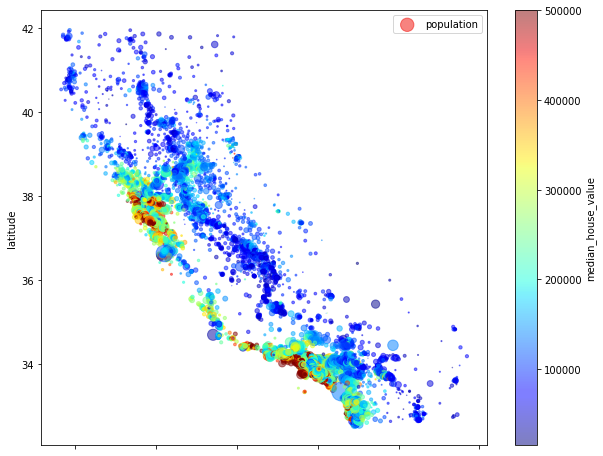

In [7]:
df_housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.5,
    s=df_housing["population"]/100,
    label="population",
    figsize=(10, 8),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True
)
plt.legend();

Trong bản đồ trên, mỗi hình tròn tương ứng với một điểm dữ liệu với bán kính thể hiện số dân (cột `population`) và màu sắc thể hiện giá nhà với màu xanh là giá thấp và màu đỏ đậm là giá cao. Chúng ta thấy rằng có hai cụm dân cư lớn ở ven biển với mức giá nhà rất cao.

So sánh với bản độ thực tế của bang California,

![cali_map](imgs/cali_map.png)

ta thấy rằng quan sát này hoàn toàn hợp lý. Khu vực Bay Area ở phía bắc và Los Angeles ở phía nam thực sự là các khu dân cư lớn với giá nhà đắt đó. Dữ liệu được lấy từ năm 1990 nhưng tới giờ vẫn chính xác.

Minh họa ngoài việc giúp chúng ta hiểu sâu thêm về dữ liệu còn giúp chúng ta kiểm định xem dữ liệu có gì bất thường không.